# Applied Stochastics 

## with applications for security and privacy

## Lecture: Markov chains basics - part 2




## Review

![Walk on square](img/square-vertices.png)

Random walk on a square $V = \{v_1, v_2, v_3, v_4\}$
( or $V = \{1, 2, 3, 4\}$)

## Initial distribution

State space

Starting point

It can be a distribution -- initial distribution

![Walk on square](img/square-vertices.png)

At time $0$ we start the walk at vertex $v_2$:   $P(X_0 = v_2) = 1$

$P(X_0 = v_1) = 0$

$P(X_0 = v_2) = 1$

$P(X_0 = v_3) = 0$

$P(X_0 = v_4) = 0$

Initial distribution $\mu = [0, 1, 0, 0] = [P(X_0 = v_1), \ldots, P(X_0 = v_4)]$

In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from numpy.linalg import matrix_power

x = np.array([[0, 1.0, 0, 0]])

## The walk

The process: random walk on a square.

State space: $V = \{v_1, v_2, v_3, v_4\}$.

Initial distribution $\mu = [0, 1, 0, 0]$

![Graph representation of the process](img/square-plain.png)



We start at $v_2$: $P(X_0 = v_2) = 1$

At time $n$ we are at $v_i$.
We toss a fair coin and move to a neighbour

$P(X_1 = v_1 | X_0 = v_2) = \frac{1}{2}$

$P(X_1 = v_3 | X_0 = v_2) = \frac{1}{2}$

How do we walk?

We toss a fair coin and move to each of two
neighbours with probability $\frac{1}{2}$.

We denote by $(X_1, \ldots)$

## The walk

The process: random walk on a square.

State space: $V = \{v_1, v_2, v_3, v_4\}$.

Initial distribution $\mu = [0, 1, 0, 0]$

![Graph representation of the process](img/square-1.png)



$P(X_1 = v_1 | X_0 = v_2) = \frac{1}{2}$

$P(X_1 = v_3 | X_0 = v_2) = \frac{1}{2}$

$P(X_2 = v_1 | X_0 = v_2, X_1 = v_3) = 0$

$P(X_2 = v_4 | X_0 = v_2, X_1 = v_1) = \frac{1}{2}$

$P(X_3 = v_1 | X_0 = v_2, X_1 = v_1, X_2 = v_2) = \frac{1}{2}$

How can we compute the distribution of $X_n$ for $n\geq 2$?

Graph with weights on edges + initial distribution
characterize the proccess.

## Markov (memoryless) property 

How can we compute the distribution of $X_n$ for $n\geq 2$?

$P(X_{1} = v_{1} | X_0 = v_2) = P(X_{1} = v_3 | X_2 = v_2) = \frac{1}{2}$

$P(X_{n+1} = i_{n+1} | X_0 = i_0, X_1 = i_1, \ldots, X_n = i_n) = ?$

## Markov property / memoryless property

$P(X_{n+1} = i_{n+1} | X_0 = i_0, X_1 = i_1, \ldots, X_n = i_n) = P(X_{n+1} = i_{n+1} | X_{n} = i_n)$

![RW](img/square-1.png)

## Time homogeneity

Markov property / memoryless property

We do not remember past - it is important what is now

Markov property

$P(X_{n+1} = i_{n+1} | X_0 = i_0, X_1 = i_1, \ldots, X_{n-1} = i_{n-1}, X_n = i_n)$

$\qquad \qquad= P(X_{n+1} = i_{n+1} | X_{n} = i_n)$

Time homogeneity - conditional distribution does not change in time

**Time homogeneity**

Conditional distribution of $X_{n+1}$ given that $X_n = v$ is the same for all $n$.

## Transition matrix

$P = \left(
\begin{array}{cccc}
 P_{1,1} & P_{1,2} & P_{1,3} & P_{1,4} \\
 P_{2,1} & P_{2,2} & P_{2,3} & P_{2,4} \\
 P_{3,1} & P_{3,2} & P_{3,3} & P_{3,4} \\
 P_{4,1} & P_{4,2} & P_{4,3} & P_{4,4} \\
\end{array}
\right)$

Definition. Let $P$ be a $k \times k$ matrix $\{P_{i, j}: i, j = 1, \ldots, k\}.$

A random process $(X_0, X_1, \ldots)$ with finite state space $V = \{v_1, \ldots, v_k\}$ is
**a (homogeneous) Markov chain with transition matrix P** if for all $n$, and all $i, j \in \{1, \ldots, k\}$ and all $i_0, \ldots, i_{n-1} \in \{1, \ldots, k\}$ we have:
$$P(X_{n+1} = i_{n+1} | X_0 = i_0, X_1 = i_1, \ldots, X_{n-1} = i_{n-1}, X_n = i_n) = $$
$$ = P(X_{n+1} = i_{n+1} | X_{n} = i_n) = P_{i, j}$$

## Transition matrix - interpretation

$P = \left(
\begin{array}{cccc}
 P_{1,1} & P_{1,2} & P_{1,3} & P_{1,4} \\
 P_{2,1} & P_{2,2} & P_{2,3} & P_{2,4} \\
 P_{3,1} & P_{3,2} & P_{3,3} & P_{3,4} \\
 P_{4,1} & P_{4,2} & P_{4,3} & P_{4,4} \\
\end{array}
\right)$

$P = \left(
\begin{array}{cccc}
 0 & \frac{1}{2} & 0 & \frac{1}{2} \\
 \frac{1}{2} & 0 & \frac{1}{2} & 0 \\
 0 & \frac{1}{2} & 0 & \frac{1}{2} \\
 \frac{1}{2} & 0 & \frac{1}{2} & 0 \\
\end{array}
\right)$

In [56]:
P = np.array([[0, .5, 0, .5],
              [.5, 0, .5, 0],
              [0, .5, 0, .5],
              [.5, 0, .5, 0]])

![RW](img/square-1.png)

## Matrix multiplication

In [57]:
x = np.array([0, 1, 0, 0])
r = np.dot(x, P)
print(str(r))

[0.5 0.  0.5 0. ]


In [58]:
from numpy.linalg import matrix_power
r = np.dot(x, matrix_power(P,1))
print(str(r))
r = np.dot(x, matrix_power(P,2))
print(str(r))
r = np.dot(x, matrix_power(P,3))
print(str(r))


[0.5 0.  0.5 0. ]
[0.  0.5 0.  0.5]
[0.5 0.  0.5 0. ]


## Distribution over time

For a Markov chain $(X_0, X_1, \ldots)$ with state space $\{s_1, \ldots, s_k\}$,
initial distribution $\mu^{(0)}$ and transition matrix $P$,
we have for any $n$ that the distribution $\mu^{(n)}$ at time $n$ satisfies
$$\mu^{(n)} = \mu^{(0)} P^n.$$

### Defining additional variables

In [59]:
stateHist = x
dfStateHist = pd.DataFrame(x)
distr_hist = [[0, 0, 0, 0]]

## Example 1

In [60]:
for i in range(50):
  x = np.dot(x, P)
  print("step:\t" + str(i+1) + "\t" + str(x))
  stateHist = np.append(stateHist, x, axis=0)
  dfDistrHist = pd.DataFrame(stateHist)

step:	1	[0.5 0.  0.5 0. ]
step:	2	[0.  0.5 0.  0.5]
step:	3	[0.5 0.  0.5 0. ]
step:	4	[0.  0.5 0.  0.5]
step:	5	[0.5 0.  0.5 0. ]
step:	6	[0.  0.5 0.  0.5]
step:	7	[0.5 0.  0.5 0. ]
step:	8	[0.  0.5 0.  0.5]
step:	9	[0.5 0.  0.5 0. ]
step:	10	[0.  0.5 0.  0.5]
step:	11	[0.5 0.  0.5 0. ]
step:	12	[0.  0.5 0.  0.5]
step:	13	[0.5 0.  0.5 0. ]
step:	14	[0.  0.5 0.  0.5]
step:	15	[0.5 0.  0.5 0. ]
step:	16	[0.  0.5 0.  0.5]
step:	17	[0.5 0.  0.5 0. ]
step:	18	[0.  0.5 0.  0.5]
step:	19	[0.5 0.  0.5 0. ]
step:	20	[0.  0.5 0.  0.5]
step:	21	[0.5 0.  0.5 0. ]
step:	22	[0.  0.5 0.  0.5]
step:	23	[0.5 0.  0.5 0. ]
step:	24	[0.  0.5 0.  0.5]
step:	25	[0.5 0.  0.5 0. ]
step:	26	[0.  0.5 0.  0.5]
step:	27	[0.5 0.  0.5 0. ]
step:	28	[0.  0.5 0.  0.5]
step:	29	[0.5 0.  0.5 0. ]
step:	30	[0.  0.5 0.  0.5]
step:	31	[0.5 0.  0.5 0. ]
step:	32	[0.  0.5 0.  0.5]
step:	33	[0.5 0.  0.5 0. ]
step:	34	[0.  0.5 0.  0.5]
step:	35	[0.5 0.  0.5 0. ]
step:	36	[0.  0.5 0.  0.5]
step:	37	[0.5 0.  0.5 0. ]
step:	38	[

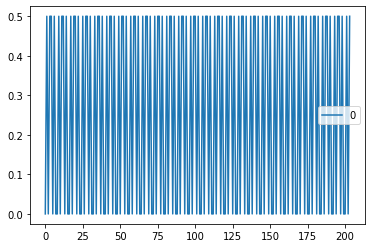

In [11]:
dfDistrHist.plot()
pyplot.show()

## Aperiodicity

A Markov chain $(X_0, X_1, \ldots)$ with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$. The **period** $d(s_i)$ of a state $s_i \in S$ is defined as
$$d(s_i) = \gcd\{n \geq 1 : (P^n)_{i,i} > 0\}.$$

The period of $s_i$ is the greatest common divisor of the set of times that the chain returns back to $s_i$, given that it started with $X_0 = s_i$.

If $d(s_i) = 1$ then the state $s_i$ is **aperiodic**.

*Definition* A Markov chain is said to be **aperiodic** if all its states are aperiodic. Otherwise the chain is said to be **periodic**.

## Example 1 - periodicity

A Markov chain $(X_0, X_1, \ldots)$ with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$. The **period** $d(s_i)$ of a state $s_i \in S$ is defined as
$$d(s_i) = \gcd\{n \geq 1 : (P^n)_{i,i} > 0\}.$$

In [61]:
P = np.array([[0, .5, 0, .5],
              [.5, 0, .5, 0],
              [0, .5, 0, .5],
              [.5, 0, .5, 0]])

In [62]:
for i in range(1,5):
  x = matrix_power(P,i)
  print("\n%s\n%s" % (i, str(x)))



1
[[0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]]

2
[[0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]]

3
[[0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]]

4
[[0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]]


## Example 2

In [63]:
P = np.array([[1/2, 0, 1/2, 0, 0], 
              [0, 1/2, 1/2, 0, 0], 
              [1/4, 1/4, 0, 1/4, 1/4], 
              [0, 0, 1/2, 1/2, 0], 
              [0, 0, 1/2, 0, 1/2]])

In [67]:
x = np.array([[0, 0, 1.0, 0, 0]])
stateHist = x
dfStateHist = pd.DataFrame(x)
distr_hist = [[0, 0, 0, 0, 0]]


In [68]:
for i in range(50):
  x = np.dot(x, P)
  print(str(i+1) + "\t" + str(x))
  stateHist = np.append(stateHist, x, axis=0)
  dfDistrHist = pd.DataFrame(stateHist)

1	[[0.25 0.25 0.   0.25 0.25]]
2	[[0.125 0.125 0.5   0.125 0.125]]
3	[[0.1875 0.1875 0.25   0.1875 0.1875]]
4	[[0.15625 0.15625 0.375   0.15625 0.15625]]
5	[[0.171875 0.171875 0.3125   0.171875 0.171875]]
6	[[0.1640625 0.1640625 0.34375   0.1640625 0.1640625]]
7	[[0.16796875 0.16796875 0.328125   0.16796875 0.16796875]]
8	[[0.16601562 0.16601562 0.3359375  0.16601562 0.16601562]]
9	[[0.16699219 0.16699219 0.33203125 0.16699219 0.16699219]]
10	[[0.16650391 0.16650391 0.33398438 0.16650391 0.16650391]]
11	[[0.16674805 0.16674805 0.33300781 0.16674805 0.16674805]]
12	[[0.16662598 0.16662598 0.33349609 0.16662598 0.16662598]]
13	[[0.16668701 0.16668701 0.33325195 0.16668701 0.16668701]]
14	[[0.16665649 0.16665649 0.33337402 0.16665649 0.16665649]]
15	[[0.16667175 0.16667175 0.33331299 0.16667175 0.16667175]]
16	[[0.16666412 0.16666412 0.33334351 0.16666412 0.16666412]]
17	[[0.16666794 0.16666794 0.33332825 0.16666794 0.16666794]]
18	[[0.16666603 0.16666603 0.33333588 0.16666603 0.16666603]

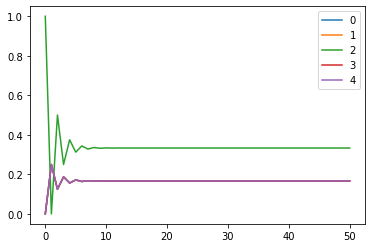

In [69]:
dfDistrHist.plot()
pyplot.show()

## Example 2 - periodicity

In [70]:
P = np.array([[1/2, 0, 1/2, 0, 0], 
              [0, 1/2, 1/2, 0, 0], 
              [1/4, 1/4, 0, 1/4, 1/4], 
              [0, 0, 1/2, 1/2, 0], 
              [0, 0, 1/2, 0, 1/2]])

In [72]:
for i in range(2,4):
  x = matrix_power(P,i)
  print("\n%s\n%s" % (i, str(x)))



2
[[0.375 0.125 0.25  0.125 0.125]
 [0.125 0.375 0.25  0.125 0.125]
 [0.125 0.125 0.5   0.125 0.125]
 [0.125 0.125 0.25  0.375 0.125]
 [0.125 0.125 0.25  0.125 0.375]]

3
[[0.25   0.125  0.375  0.125  0.125 ]
 [0.125  0.25   0.375  0.125  0.125 ]
 [0.1875 0.1875 0.25   0.1875 0.1875]
 [0.125  0.125  0.375  0.25   0.125 ]
 [0.125  0.125  0.375  0.125  0.25  ]]


In [73]:
import math
p = math.gcd(2, 3)
print(str(p))

1


## Irreducible Markov chains

State $s_i$ **communicates** with state $s_j$ (we denote it by $s_i \rightarrow s_j$) if there exists such an $n$ that 
$$P(X_{m+n} = s_j | X_m = s_i) > 0.$$

If $s_i \rightarrow s_j$ and $s_j \rightarrow s_i$ then states $s_i$ and $s_j$ **intercommunicate** (denoted by $s_i \leftrightarrow s_j$).

*Def.* A Markov chain $(X_0, X_1, \ldots)$ with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$ is said to be **irreducible** if for all $s_i, s_j \in S$ we have that $s_i \leftrightarrow s_j$. Otherwise the chain is said to be **reducible**.

## Example - reducibility

In [74]:
P = np.array([[1/2, 1/2,  0, 0], 
              [0.4, 0.6,  0, 0], 
              [0, 0, 1/4, 3/4], 
              [0, 0, 1/2, 1/2]])

In [75]:
for i in range(1,10):
  x = matrix_power(P,i)
  print("\n%s\n%s" % (i, str(x)))



1
[[0.5  0.5  0.   0.  ]
 [0.4  0.6  0.   0.  ]
 [0.   0.   0.25 0.75]
 [0.   0.   0.5  0.5 ]]

2
[[0.45   0.55   0.     0.    ]
 [0.44   0.56   0.     0.    ]
 [0.     0.     0.4375 0.5625]
 [0.     0.     0.375  0.625 ]]

3
[[0.445    0.555    0.       0.      ]
 [0.444    0.556    0.       0.      ]
 [0.       0.       0.390625 0.609375]
 [0.       0.       0.40625  0.59375 ]]

4
[[0.4445     0.5555     0.         0.        ]
 [0.4444     0.5556     0.         0.        ]
 [0.         0.         0.40234375 0.59765625]
 [0.         0.         0.3984375  0.6015625 ]]

5
[[0.44445    0.55555    0.         0.        ]
 [0.44444    0.55556    0.         0.        ]
 [0.         0.         0.39941406 0.60058594]
 [0.         0.         0.40039062 0.59960938]]

6
[[0.444445   0.555555   0.         0.        ]
 [0.444444   0.555556   0.         0.        ]
 [0.         0.         0.40014648 0.59985352]
 [0.         0.         0.39990234 0.60009766]]

7
[[0.4444445  0.5555555  0.         0.

## Example - continued

In [76]:
P = np.array([[1/2, 1/2,  0, 0], 
              [0.4, 0.6,  0, 0], 
              [0, 0, 1/4, 3/4], 
              [0, 0, 1/2, 1/2]])

In [80]:
x = np.array([[0, 1.0, 0, 0]])
stateHist = x
dfStateHist = pd.DataFrame(x)
distr_hist = [[0, 0, 0, 0]]

In [81]:
for i in range(50):
  x = np.dot(x, P)
  print(str(i+1) + "\t" + str(x))
  stateHist = np.append(stateHist, x, axis=0)
  dfDistrHist = pd.DataFrame(stateHist)

1	[[0.4 0.6 0.  0. ]]
2	[[0.44 0.56 0.   0.  ]]
3	[[0.444 0.556 0.    0.   ]]
4	[[0.4444 0.5556 0.     0.    ]]
5	[[0.44444 0.55556 0.      0.     ]]
6	[[0.444444 0.555556 0.       0.      ]]
7	[[0.4444444 0.5555556 0.        0.       ]]
8	[[0.44444444 0.55555556 0.         0.        ]]
9	[[0.44444444 0.55555556 0.         0.        ]]
10	[[0.44444444 0.55555556 0.         0.        ]]
11	[[0.44444444 0.55555556 0.         0.        ]]
12	[[0.44444444 0.55555556 0.         0.        ]]
13	[[0.44444444 0.55555556 0.         0.        ]]
14	[[0.44444444 0.55555556 0.         0.        ]]
15	[[0.44444444 0.55555556 0.         0.        ]]
16	[[0.44444444 0.55555556 0.         0.        ]]
17	[[0.44444444 0.55555556 0.         0.        ]]
18	[[0.44444444 0.55555556 0.         0.        ]]
19	[[0.44444444 0.55555556 0.         0.        ]]
20	[[0.44444444 0.55555556 0.         0.        ]]
21	[[0.44444444 0.55555556 0.         0.        ]]
22	[[0.44444444 0.55555556 0.         0.        ]]

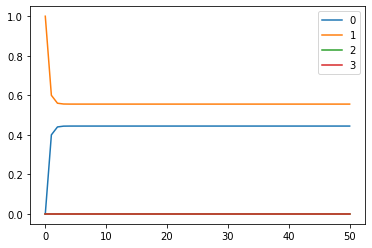

In [82]:
dfDistrHist.plot()
pyplot.show()

*Thm 4.1* Let $(X_0, x_1, \ldots)$ be an aperiodic Markov chain with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$. Then there exists $N < \infty$ such that 
$$(P^n)_{i,i} > 0$$
for all $i \in \{1, \ldots, k\}$ and all $n \geq N$.

## Example - RC4

Source: Section 4 of [Strong stationary times and its use in cryptography](https://arxiv.org/pdf/1709.02631.pdf)

In [83]:
n = 256
P = np.array([[1/n, 1-1/n], 
              [1-1/n, 1/n]])

In [97]:
x = np.array([[1, 0]])
stateHist = x
dfStateHist = pd.DataFrame(x)
distr_hist = [[0, 0]]

In [98]:
for i in range(2600):
  x = np.dot(x, P)
  print(str(i+1) + "\t" + str(x))
  stateHist = np.append(stateHist, x, axis=0)
  dfDistrHist = pd.DataFrame(stateHist)

1	[[0.00390625 0.99609375]]
2	[[0.99221802 0.00778198]]
3	[[0.01162744 0.98837256]]
4	[[0.98455715 0.01544285]]
5	[[0.01922845 0.98077155]]
6	[[0.97701552 0.02298448]]
7	[[0.02671116 0.97328884]]
8	[[0.96959127 0.03040873]]
9	[[0.03407741 0.96592259]]
10	[[0.96228257 0.03771743]]
11	[[0.04132901 0.95867099]]
12	[[0.95508762 0.04491238]]
13	[[0.04846775 0.95153225]]
14	[[0.94800465 0.05199535]]
15	[[0.05549539 0.94450461]]
16	[[0.94103192 0.05896808]]
17	[[0.06241364 0.93758636]]
18	[[0.93416772 0.06583228]]
19	[[0.06922422 0.93077578]]
20	[[0.92741035 0.07258965]]
21	[[0.0759288 0.9240712]]
22	[[0.92075815 0.07924185]]
23	[[0.08252903 0.91747097]]
24	[[0.91420948 0.08579052]]
25	[[0.08902653 0.91097347]]
26	[[0.90776274 0.09223726]]
27	[[0.09542291 0.90457709]]
28	[[0.90141633 0.09858367]]
29	[[0.10171973 0.89828027]]
30	[[0.8951687 0.1048313]]
31	[[0.10791855 0.89208145]]
32	[[0.88901831 0.11098169]]
33	[[0.11402089 0.88597911]]
34	[[0.88296365 0.11703635]]
35	[[0.12002826 0.87997174]

613	[[0.49591737 0.50408263]]
614	[[0.50405073 0.49594927]]
615	[[0.49598092 0.50401908]]
616	[[0.50398768 0.49601232]]
617	[[0.49604347 0.50395653]]
618	[[0.50392562 0.49607438]]
619	[[0.49610505 0.50389495]]
620	[[0.50386452 0.49613548]]
621	[[0.49616567 0.50383433]]
622	[[0.50380437 0.49619563]]
623	[[0.49622535 0.50377465]]
624	[[0.50374516 0.49625484]]
625	[[0.4962841 0.5037159]]
626	[[0.50368687 0.49631313]]
627	[[0.49634193 0.50365807]]
628	[[0.50362949 0.49637051]]
629	[[0.49639886 0.50360114]]
630	[[0.503573 0.496427]]
631	[[0.49645491 0.50354509]]
632	[[0.50351739 0.49648261]]
633	[[0.49651009 0.50348991]]
634	[[0.50346265 0.49653735]]
635	[[0.4965644 0.5034356]]
636	[[0.50340876 0.49659124]]
637	[[0.49661788 0.50338212]]
638	[[0.5033557 0.4966443]]
639	[[0.49667051 0.50332949]]
640	[[0.50330347 0.49669653]]
641	[[0.49672233 0.50327767]]
642	[[0.50325206 0.49674794]]
643	[[0.49677335 0.50322665]]
644	[[0.50320144 0.49679856]]
645	[[0.49682357 0.50317643]]
646	[[0.50315162 0.4

1181	[[0.49995256 0.50004744]]
1182	[[0.50004707 0.49995293]]
1183	[[0.49995329 0.50004671]]
1184	[[0.50004634 0.49995366]]
1185	[[0.49995402 0.50004598]]
1186	[[0.50004562 0.49995438]]
1187	[[0.49995474 0.50004526]]
1188	[[0.50004491 0.49995509]]
1189	[[0.49995544 0.50004456]]
1190	[[0.50004421 0.49995579]]
1191	[[0.49995613 0.50004387]]
1192	[[0.50004352 0.49995648]]
1193	[[0.49995682 0.50004318]]
1194	[[0.50004285 0.49995715]]
1195	[[0.49995749 0.50004251]]
1196	[[0.50004218 0.49995782]]
1197	[[0.49995815 0.50004185]]
1198	[[0.50004152 0.49995848]]
1199	[[0.4999588 0.5000412]]
1200	[[0.50004088 0.49995912]]
1201	[[0.49995944 0.50004056]]
1202	[[0.50004024 0.49995976]]
1203	[[0.49996007 0.50003993]]
1204	[[0.50003961 0.49996039]]
1205	[[0.4999607 0.5000393]]
1206	[[0.500039 0.499961]]
1207	[[0.49996131 0.50003869]]
1208	[[0.50003839 0.49996161]]
1209	[[0.49996191 0.50003809]]
1210	[[0.50003779 0.49996221]]
1211	[[0.4999625 0.5000375]]
1212	[[0.5000372 0.4999628]]
1213	[[0.49996309 0.

1778	[[0.50000044 0.49999956]]
1779	[[0.49999956 0.50000044]]
1780	[[0.50000043 0.49999957]]
1781	[[0.49999957 0.50000043]]
1782	[[0.50000043 0.49999957]]
1783	[[0.49999958 0.50000042]]
1784	[[0.50000042 0.49999958]]
1785	[[0.49999958 0.50000042]]
1786	[[0.50000041 0.49999959]]
1787	[[0.49999959 0.50000041]]
1788	[[0.50000041 0.49999959]]
1789	[[0.4999996 0.5000004]]
1790	[[0.5000004 0.4999996]]
1791	[[0.4999996 0.5000004]]
1792	[[0.50000039 0.49999961]]
1793	[[0.49999961 0.50000039]]
1794	[[0.50000039 0.49999961]]
1795	[[0.49999962 0.50000038]]
1796	[[0.50000038 0.49999962]]
1797	[[0.49999962 0.50000038]]
1798	[[0.50000038 0.49999962]]
1799	[[0.49999963 0.50000037]]
1800	[[0.50000037 0.49999963]]
1801	[[0.49999963 0.50000037]]
1802	[[0.50000036 0.49999964]]
1803	[[0.49999964 0.50000036]]
1804	[[0.50000036 0.49999964]]
1805	[[0.49999964 0.50000036]]
1806	[[0.50000035 0.49999965]]
1807	[[0.49999965 0.50000035]]
1808	[[0.50000035 0.49999965]]
1809	[[0.49999966 0.50000034]]
1810	[[0.50000

2362	[[0.5 0.5]]
2363	[[0.5 0.5]]
2364	[[0.5 0.5]]
2365	[[0.5 0.5]]
2366	[[0.5 0.5]]
2367	[[0.5 0.5]]
2368	[[0.5 0.5]]
2369	[[0.5 0.5]]
2370	[[0.5 0.5]]
2371	[[0.5 0.5]]
2372	[[0.5 0.5]]
2373	[[0.5 0.5]]
2374	[[0.5 0.5]]
2375	[[0.5 0.5]]
2376	[[0.5 0.5]]
2377	[[0.5 0.5]]
2378	[[0.5 0.5]]
2379	[[0.5 0.5]]
2380	[[0.5 0.5]]
2381	[[0.5 0.5]]
2382	[[0.5 0.5]]
2383	[[0.5 0.5]]
2384	[[0.5 0.5]]
2385	[[0.5 0.5]]
2386	[[0.5 0.5]]
2387	[[0.5 0.5]]
2388	[[0.5 0.5]]
2389	[[0.5 0.5]]
2390	[[0.5 0.5]]
2391	[[0.5 0.5]]
2392	[[0.5 0.5]]
2393	[[0.5 0.5]]
2394	[[0.5 0.5]]
2395	[[0.5 0.5]]
2396	[[0.5 0.5]]
2397	[[0.5 0.5]]
2398	[[0.5 0.5]]
2399	[[0.5 0.5]]
2400	[[0.5 0.5]]
2401	[[0.5 0.5]]
2402	[[0.5 0.5]]
2403	[[0.5 0.5]]
2404	[[0.5 0.5]]
2405	[[0.5 0.5]]
2406	[[0.5 0.5]]
2407	[[0.5 0.5]]
2408	[[0.5 0.5]]
2409	[[0.5 0.5]]
2410	[[0.5 0.5]]
2411	[[0.5 0.5]]
2412	[[0.5 0.5]]
2413	[[0.5 0.5]]
2414	[[0.5 0.5]]
2415	[[0.5 0.5]]
2416	[[0.5 0.5]]
2417	[[0.5 0.5]]
2418	[[0.5 0.5]]
2419	[[0.5 0.5]]
2420	[[0.5 0.5

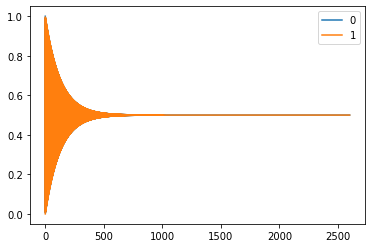

In [99]:
dfDistrHist.plot()
pyplot.show()

*Def 5.1* Let $(X_0, X_1, \ldots)$ be a Markov chain with state space $\{s_1, \ldots, s_k\}$ and transition matrix $P$. A row vector $\pi = (\pi_1, \ldots, \pi_k)$ is said to be a **stationary distribution** for the Markov chain, if it satisfies:

(i) $\pi_i \geq 0$ for $i = 1, \ldots, k$, and $\sum_{i=1}^k \pi_i = 1$, and 

(ii) $\pi P = \pi$, meaning that $\sum_{i=1}^k \pi_i P_{i, j} = \pi_j$ for $j = 1, \ldots, k$.